<h1 align=center><font size = 7>Data Preparation</font></h1>

# **Data Preparation**

> **What is data preparation process?**

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data.

# BoxPlot

<a href="https://ibb.co/ZGtXd9M"><img src="https://i.ibb.co/Bcd3LkC/2.png" alt="poxblot" border="0"></a>

## **📤 Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 💾 Read Data

In [2]:
df = pd.read_csv("../input/covid19/Detection of COVID-19 Infection from Routine Blood Exams.csv")

# 🔎 Check the basic information of the dataset

In [3]:
df.head()

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,2
1,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,2
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
3,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,2
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SESSO       279 non-null    object 
 1   AGE         279 non-null    int64  
 2   WBC         277 non-null    float64
 3   Piastrine   277 non-null    float64
 4   Neutrofili  209 non-null    float64
 5   Linfociti   209 non-null    object 
 6   Monociti    209 non-null    float64
 7   Eosinofili  209 non-null    float64
 8   Basofili    208 non-null    float64
 9   PCR         273 non-null    float64
 10  AST         277 non-null    float64
 11  ALT         266 non-null    float64
 12  ALP         131 non-null    float64
 13  GGT         136 non-null    float64
 14  LDH         194 non-null    float64
 15  TARGET      279 non-null    int64  
dtypes: float64(12), int64(2), object(2)
memory usage: 35.0+ KB


In [5]:
df.shape

(279, 16)

In [6]:
df.isnull().sum()

SESSO           0
AGE             0
WBC             2
Piastrine       2
Neutrofili     70
Linfociti      70
Monociti       70
Eosinofili     70
Basofili       71
PCR             6
AST             2
ALT            13
ALP           148
GGT           143
LDH            85
TARGET          0
dtype: int64

In [7]:
# df["Linfociti"].astype(float)

In [8]:
inx = df[df['Linfociti']=='0-4'].index

In [9]:
df["Linfociti"][inx]=0.4

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df["Linfociti"]=df["Linfociti"].astype(float)

# **1. Dealing with Outliers**

**Definition:**

**In Statistics, an outlier is a data point that differs significantly from other observations (Grubbs, 1969; Maddala, 1992).**

**An outlier may be due to variability in the measurement or it may indicate experimental error, the latter are sometimes excluded from the data set (Grubbs, 1969).**

**Anoutlier can couse serious problem in statistical analysis.**

* [Wikipedia Article](http://en.wikipedia.org/wiki/Outlier)


In [11]:
df_corr = df.corr().sort_values('TARGET', ascending=False).loc[['TARGET']]
df_corr

,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
TARGET,0.096823,-0.032397,0.030131,0.019409,-0.279963,-0.193461,-0.09819,0.057408,0.302248,0.248244,0.223103,-0.09588,-0.013642,0.432503,1.0


In [12]:
df_corr.loc['TARGET'].sort_values(ascending=False)

TARGET        1.000000
LDH           0.432503
PCR           0.302248
AST           0.248244
ALT           0.223103
AGE           0.096823
Basofili      0.057408
Piastrine     0.030131
Neutrofili    0.019409
GGT          -0.013642
WBC          -0.032397
ALP          -0.095880
Eosinofili   -0.098190
Monociti     -0.193461
Linfociti    -0.279963
Name: TARGET, dtype: float64

### 🟣 **Remove the outliers**

# Test

<Axes:xlabel='TARGET', ylabel='LDH'>

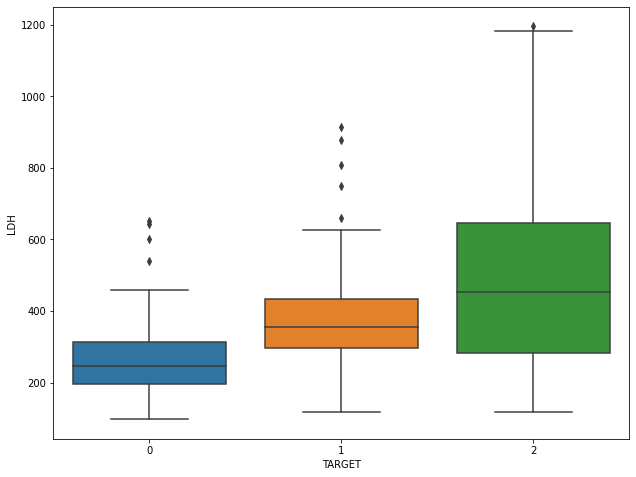

In [13]:
fig = plt.figure( figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])
sns.boxplot(ax=ax, data=df, x='TARGET', y='LDH')#,flierprops=dict(marker='o', markersize=6),fliersize=2)

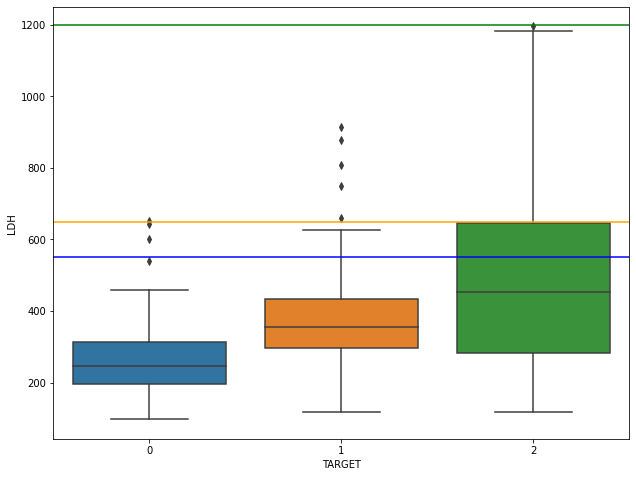

In [14]:
fig = plt.figure( figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])
sns.boxplot(ax=ax, data=df, x='TARGET', y='LDH')#,flierprops=dict(marker='o', markersize=6),fliersize=2)

ax.axhline(y=550,color='b')
ax.axhline(y=650,color='orange')
ax.axhline(y=1200,color='g')

# OUTLIERS Fun

In [15]:
def outliers(df,Target, feature, T):
    #q1, q3, max, min, IQR, mide
    #upperbound
    
    q1=df[df[Target]==T][feature].quantile(0.25)
    q3 = df[df[Target]==T][feature].quantile(0.75)
    
    iqr = q3 - q1
    
    ub = (q3 +(1.5 * iqr))
#     lb=(q1 - (1.5*iqr))
    
    return ub

In [16]:
def upperbound(df,Target, feature):
    ubs=[]
    for T in range(len(df[feature].unique())):
        ubs.append(outliers(df,Target,feature,T))
    return ubs

In [17]:
def boxplot(df,Target, feature):
    fig = plt.figure( figsize=(8, 6))
    ax = fig.add_axes([0,0,1,1])
    sns.boxplot(ax=ax, data=df, x=Target, y=feature,flierprops=dict(marker='o', markersize=6),fliersize=2)
    
    y = upperbound(df,Target, feature)

    ax.axhline(y[0],color='b')
    ax.axhline(y[1],color='orange')
    ax.axhline(y[2],color='g')

In [18]:
def drop_outliers(df,Target, feature):
    ubs=[]
    ubs=upperbound(df,Target, feature)
    
    for T in range(len(df[feature].unique())):
        
        df = df.drop(index= df[ df[Target] == T ][feature][df[feature] > ubs[T]].index, axis=0)
    
    return df

# LDH

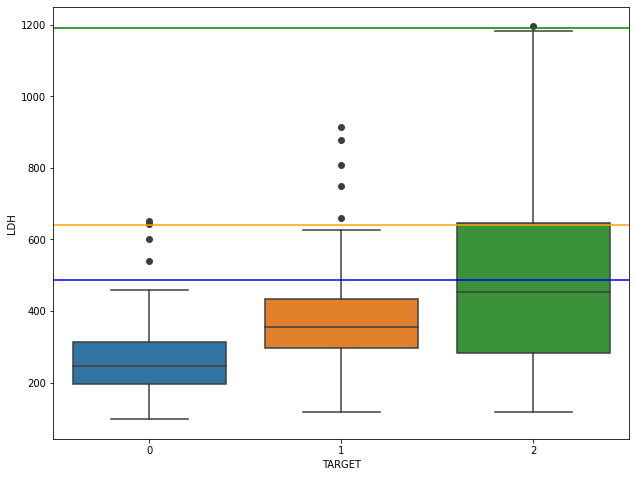

In [19]:
boxplot(df,'TARGET', 'LDH')

In [20]:
df = drop_outliers(df,'TARGET', 'LDH')

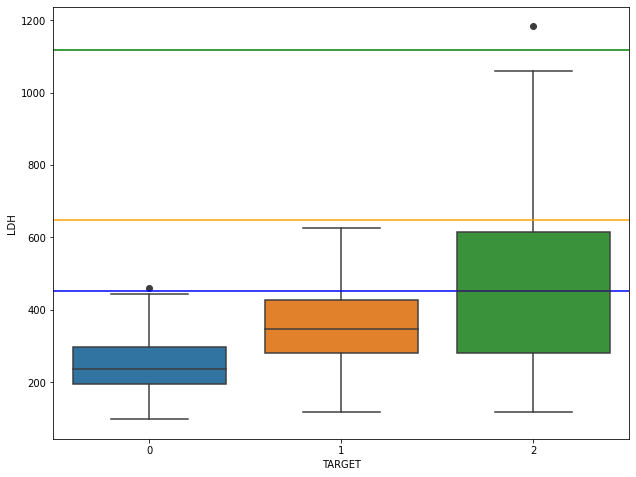

In [21]:
boxplot(df,'TARGET', 'LDH')

# PCR

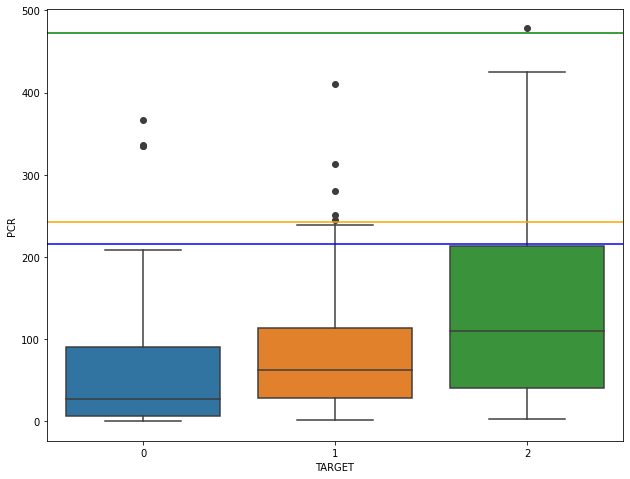

In [22]:
boxplot(df,'TARGET', 'PCR')

In [23]:
df=drop_outliers(df,'TARGET', 'PCR')

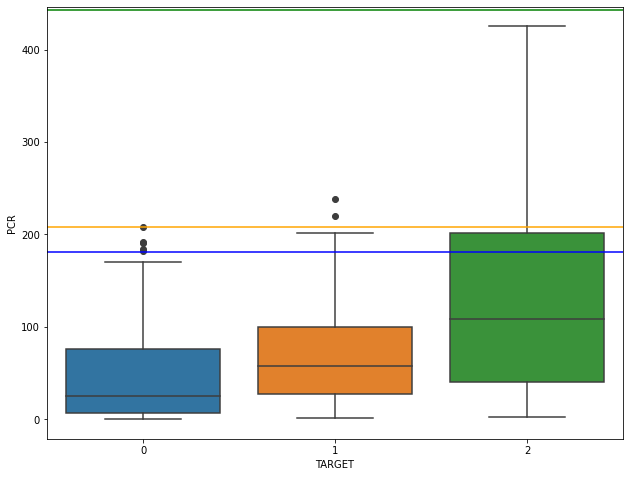

In [24]:
boxplot(df,'TARGET', 'PCR')

# AST

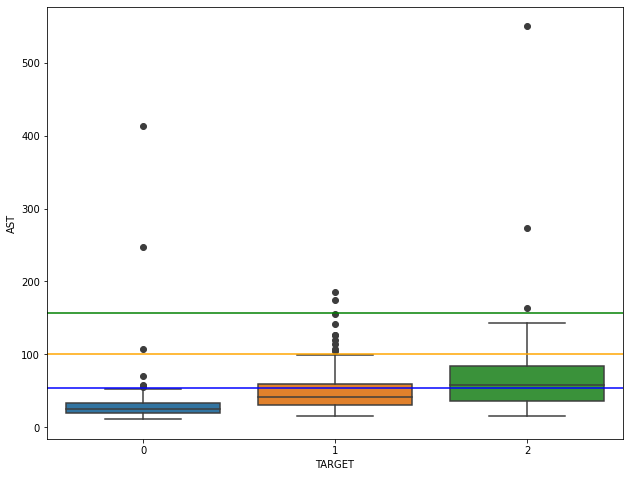

In [25]:
boxplot(df,'TARGET', 'AST')

In [26]:
df=drop_outliers(df,'TARGET', 'AST')

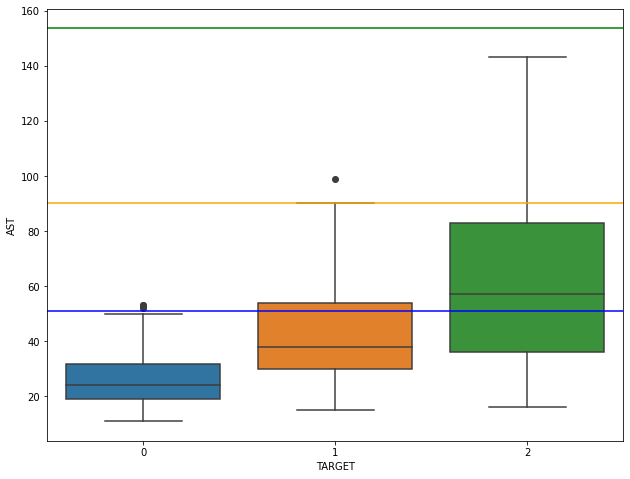

In [27]:
boxplot(df,'TARGET', 'AST')

# ALT

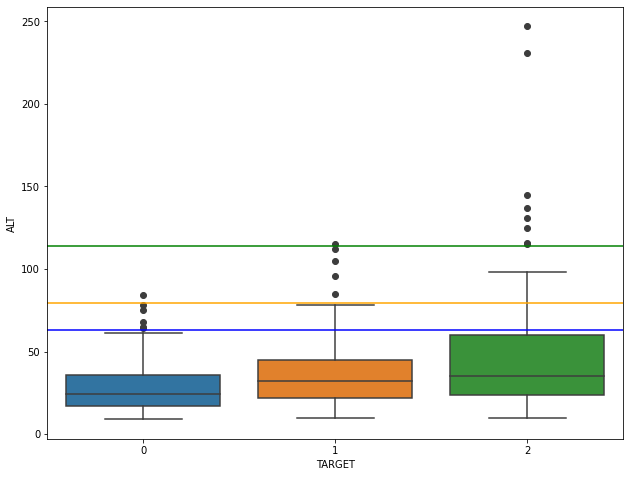

In [28]:
boxplot(df,'TARGET', 'ALT')

In [29]:
df=drop_outliers(df,'TARGET', 'ALT')

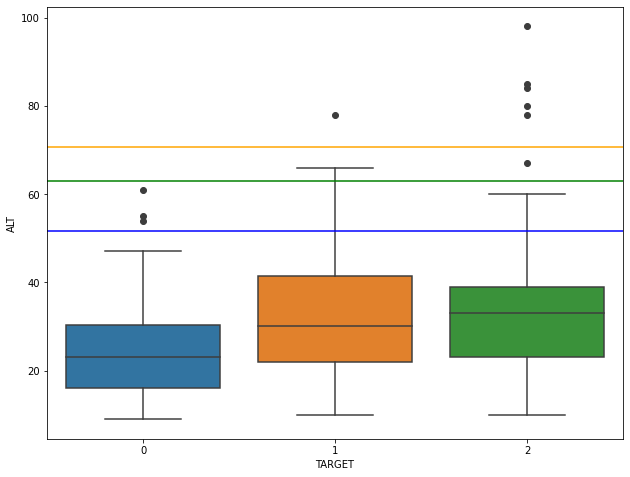

In [30]:
boxplot(df,'TARGET', 'ALT')

# Linfociti

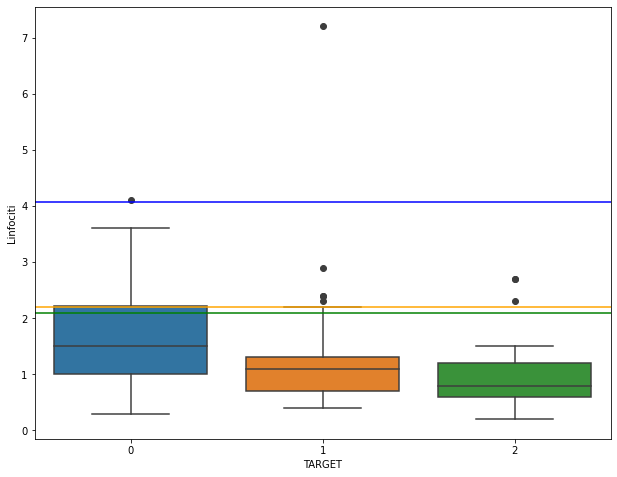

In [31]:
boxplot(df,'TARGET', 'Linfociti')

In [32]:
df=drop_outliers(df,'TARGET', 'Linfociti')

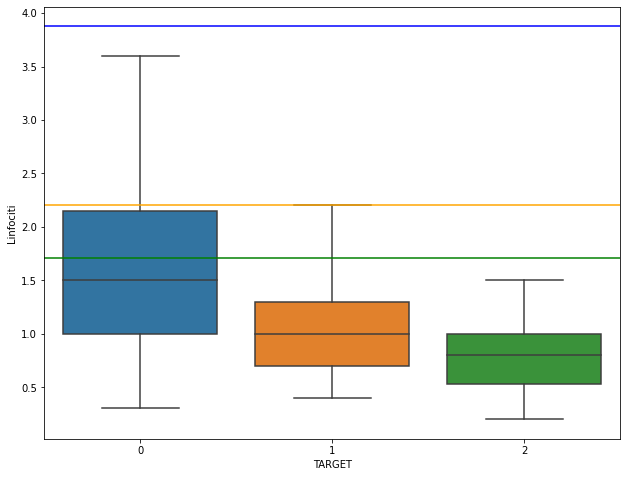

In [33]:
boxplot(df,'TARGET', 'Linfociti')

In [34]:
df.shape

(210, 16)

# **2. Dealing with Missing Data**

**In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.**

[Wikipedia Article](http://en.wikipedia.org/wiki/Missing_data)


### 🟣 **Fill/Keep/Drop?**

In [35]:
df.head()

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,2
1,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,2
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
3,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,2
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


## **A. How Much Data is Missing?**

In [36]:
df.isnull().sum()

SESSO           0
AGE             0
WBC             2
Piastrine       2
Neutrofili     59
Linfociti      59
Monociti       59
Eosinofili     58
Basofili       59
PCR             6
AST             2
ALT             9
ALP           115
GGT           110
LDH            68
TARGET          0
dtype: int64

### **🟣 Make a Function to calculate the percent of missing data in each columns (feature) and then sort it**

In [37]:
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [38]:
nan_percent= missing_percent(df)

In [39]:
nan_percent

WBC            0.952381
Piastrine      0.952381
AST            0.952381
PCR            2.857143
ALT            4.285714
Eosinofili    27.619048
Neutrofili    28.095238
Linfociti     28.095238
Monociti      28.095238
Basofili      28.095238
LDH           32.380952
GGT           52.380952
ALP           54.761905
dtype: float64

### **🟣 Plot the feature with missing indicating the percent of missing data:**

In [40]:
def plot(df):
    nan_percent= missing_percent(df)
    plt.figure(figsize=(12,6))
    sns.barplot(x=nan_percent.index, y=nan_percent)
    plt.xticks(rotation=90)

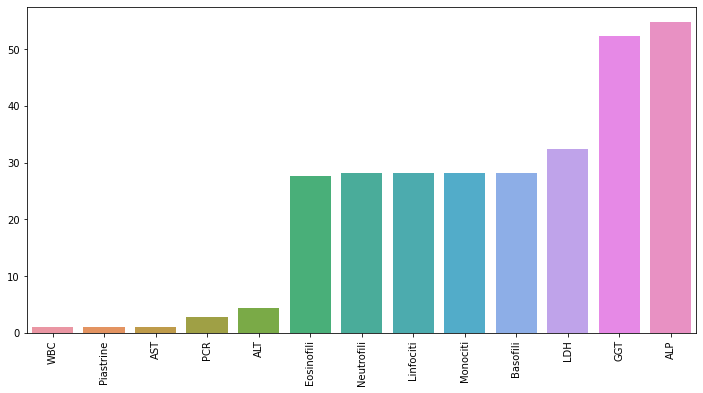

In [41]:
plot(df)

### **B. Working base on Rows Missing Data**

**If only a few rows are missing some values, then it might just be a good idea to drop those rows.** 

**What does this cost you in terms of performace? It essentialy removes potential training/testing data, but if its only a few rows, its unlikely to change performance.**


**Sometimes it is a good idea to remove a feature entirely if it has too many null values. However, you should carefully consider why it has so many null values, in certain situations null could just be used as a separate category.** 

(Take for example a feature column for the number of cars that can fit into a garage. Perhaps if there is no garage then there is a null value, instead of a zero. It probably makes more sense to quickly fill the null values in this case with a zero instead of a null. Only you can decide based off your domain expertise and knowledge of the data set!)

**every Feature with missing data must be checked!**

**We choose a threshold of 1%. It means, if there is less than 1% of a feature are missing,then we will consider just dropping that rows**

In [42]:
nan_percent[nan_percent < 1]

WBC          0.952381
Piastrine    0.952381
AST          0.952381
dtype: float64

In [43]:
df[df['WBC'].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
40,M,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
69,M,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.8,27.0,39.0,NaN,NaN,321.0,2


In [44]:
df[df['Piastrine'].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
40,M,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
69,M,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.8,27.0,39.0,NaN,NaN,321.0,2


In [45]:
df[df['AST'].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
40,M,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


### **🟣 Dropping Rows:**

In [46]:
cor=df.corr().sort_values('TARGET', ascending=False)
cor['TARGET']

TARGET        1.000000
AST           0.575522
LDH           0.543770
PCR           0.477822
ALT           0.303427
AGE           0.153880
GGT           0.095200
Neutrofili    0.026496
Piastrine     0.007783
WBC          -0.007887
Basofili     -0.015313
ALP          -0.036257
Eosinofili   -0.134063
Monociti     -0.261152
Linfociti    -0.459139
Name: TARGET, dtype: float64

In [47]:
df= df.dropna(axis=0, subset=['WBC', 'Piastrine', 'AST'])

In [48]:
nan_percent= missing_percent(df)

In [49]:
nan_percent[nan_percent < 1]

Series([], dtype: float64)

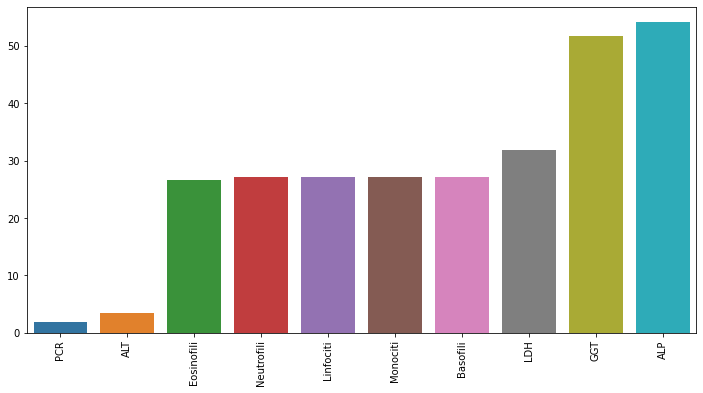

In [50]:
plot(df)

### **🟣 Filling the missing values:**

## **C. Working based on Columns Missing Data**

In [51]:
nan_percent= missing_percent(df)
nan_percent[nan_percent < 10]

PCR    1.932367
ALT    3.381643
dtype: float64

In [52]:
df['PCR'] = df['PCR'].fillna(df['PCR'].mean())

In [53]:
df['ALT'] = df['ALT'].fillna(df['ALT'].mean())

In [54]:
nan_percent= missing_percent(df)

In [55]:
nan_percent

Eosinofili    26.570048
Neutrofili    27.053140
Linfociti     27.053140
Monociti      27.053140
Basofili      27.053140
LDH           31.884058
GGT           51.690821
ALP           54.106280
dtype: float64

### **🟣 Remove the Columns with more than 50% missing values**

# GGT

In [56]:
df=df.drop('GGT', axis=1)

In [57]:
nan_percent= missing_percent(df)
nan_percent

Eosinofili    26.570048
Neutrofili    27.053140
Linfociti     27.053140
Monociti      27.053140
Basofili      27.053140
LDH           31.884058
ALP           54.106280
dtype: float64

# ALP

In [58]:
df=df.drop('ALP', axis=1)

In [59]:
nan_percent= missing_percent(df)
nan_percent

Eosinofili    26.570048
Neutrofili    27.053140
Linfociti     27.053140
Monociti      27.053140
Basofili      27.053140
LDH           31.884058
dtype: float64

# PLOT

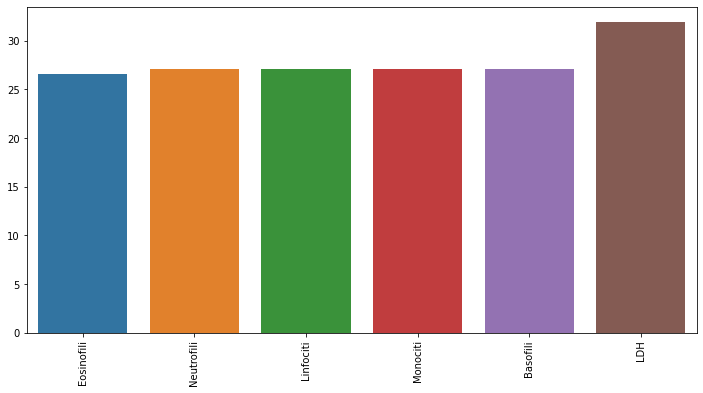

In [60]:
plot(df)

## **D. Imputation of Missing Data**

## What are the Stages of Life?

- Infant = 0-1 year.
- Toddler = 2-4 yrs.
- Child = 5-12 yrs.
- Teen = 13-19 yrs.
- Adult = 20-39 yrs.
- Middle Age Adult = 40-59 yrs.
- Senior Adult = 60+

In [61]:
np.sort(df['AGE'].unique())

array([ 0, 18, 23, 25, 26, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41,
       42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77,
       79, 80, 81, 82, 84, 85, 86, 87, 89, 90, 91, 93, 94, 95])

In [62]:
# Creating Age Group Feature

def ageGroups(age):
    
    if(age>=0 and age<=19):
        return 'Teen'
    
    elif(age>19 and age<=39):
        return 'Adult'
    
    elif(age>39 and age<=59):
        return 'Middle Age Adult'
    
    elif(age>=60):
        return 'Senior Adult'

In [63]:
df['AgeGroups'] = df['AGE'].apply(ageGroups)

In [64]:
df['AgeGroups'].unique()

array(['Middle Age Adult', 'Senior Adult', 'Teen', 'Adult'], dtype=object)

# Eosinofili

In [65]:
df.head()

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,LDH,TARGET,AgeGroups
0,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.000000,36.0,18.0,257.0,2,Middle Age Adult
1,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.500000,25.0,14.0,207.0,2,Middle Age Adult
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.700000,31.0,22.0,NaN,2,Senior Adult
3,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.700000,96.0,33.0,651.0,2,Senior Adult
5,M,77,3.0,162.0,2.0,0.4,0.4,0.1,NaN,79.551724,21.0,10.0,220.0,2,Senior Adult


In [66]:
df['Eosinofili'] = df.groupby('AgeGroups')['Eosinofili'].transform(lambda x: x.fillna(x.mean()))

In [67]:
nan_percent= missing_percent(df)
nan_percent

Neutrofili    27.053140
Linfociti     27.053140
Monociti      27.053140
Basofili      27.053140
LDH           31.884058
dtype: float64

# Neutrofili

In [68]:
df['Neutrofili'] = df['Neutrofili'].fillna(df['Neutrofili'].mean())

In [69]:
nan_percent= missing_percent(df)
nan_percent

Linfociti    27.053140
Monociti     27.053140
Basofili     27.053140
LDH          31.884058
dtype: float64

# Linfociti

In [70]:
male   = df[df['SESSO']=='M']
female = df[df['SESSO']=='F']

male['Linfociti']   = male.groupby(by='AgeGroups')['Linfociti'].transform(lambda x : x.fillna(x.mean()))
female['Linfociti'] = female.groupby(by='AgeGroups')['Linfociti'].transform(lambda x : x.fillna(x.mean()))

df = pd.concat([male,female],axis=0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [71]:
nan_percent= missing_percent(df)
nan_percent

Linfociti     0.483092
Monociti     27.053140
Basofili     27.053140
LDH          31.884058
dtype: float64

In [72]:
df[df['Linfociti'].isnull()==True]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,LDH,TARGET,AgeGroups
202,F,18,9.2,311.0,5.913907,NaN,NaN,0.0,NaN,0.1,24.0,27.0,142.0,0,Teen


In [73]:
female[female['AgeGroups']=='Teen']

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,LDH,TARGET,AgeGroups
202,F,18,9.2,311.0,5.913907,NaN,NaN,0.0,NaN,0.1,24.0,27.0,142.0,0,Teen


In [74]:
df['Linfociti'] = df['Linfociti'].fillna(df['Linfociti'].mean())

In [75]:
nan_percent= missing_percent(df)
nan_percent

Monociti    27.053140
Basofili    27.053140
LDH         31.884058
dtype: float64

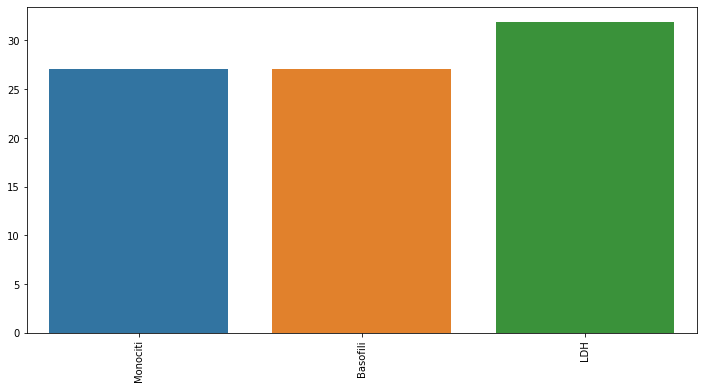

In [76]:
plot(df)

# Monociti

In [77]:
df['Monociti'] = df['Monociti'].fillna(df['Monociti'].mean())

In [78]:
nan_percent= missing_percent(df)
nan_percent

Basofili    27.053140
LDH         31.884058
dtype: float64

# Basofili

In [79]:
df['Basofili'] = df.groupby(by='AgeGroups')['Basofili'].transform(lambda x : x.fillna(x.mean()))

In [80]:
nan_percent= missing_percent(df)
nan_percent

LDH    31.884058
dtype: float64

# LDH

In [81]:
df['LDH'] = df.groupby(by='AgeGroups')['Eosinofili'].transform(lambda x : x.fillna(x.mean()))

In [82]:
nan_percent = missing_percent(df)
nan_percent

Series([], dtype: float64)

# **Now, we don't have any Missing Data**

In [83]:
nan_percent= missing_percent(df)
nan_percent

Series([], dtype: float64)

In [84]:
#We have the error, but this error is happy because it indicates the end of missing data.

# plt.figure(figsize=(12,6))
# sns.barplot(x=nan_percent.index, y=nan_percent)
# plt.xticks(rotation=90)

## Best Wishes! 😉🤞


